In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1 Multiclass classification

## 1.1. Dataset

In [90]:
matdata = sio.loadmat("ex3data1.mat", struct_as_record = False)

global y
global X
global y_one
global lambda_

X = matdata['X'] 
y = matdata['y']

print("X shape:",X.shape)
print("y shape:",y.shape)

('X shape:', (5000, 400))
('y shape:', (5000, 1))


## 1.2 Visualizing the data

Labels:
[[ 10.  10.  10.  10.  10.]
 [  1.   1.  10.  10.  10.]
 [  1.  10.  10.   2.  10.]
 [  3.   2.   3.   2.   1.]
 [ 10.   5.   4.   6.  10.]]


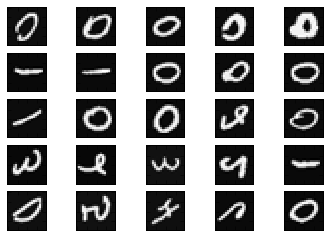

In [42]:
%matplotlib inline
fig = plt.figure()
y_labels = np.zeros((25))
for i in range(1,26):
    idx = i*np.random.randint(1,150) # Random image index
    
    # Show image
    ax = fig.add_subplot(5,5,i)
    ax.matshow(X[idx,:].reshape(20,20), interpolation='nearest', cmap=plt.cm.gray)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    y_labels[i-1] = (y[idx][0]) # Add label

print("Labels:")
print(y_labels.reshape(5,5))

## 1.3 Vectorizing logistic regression

### 1.3.1, 1.3.2, 1.3.3 Vectorizing cost function and gradient

In [81]:
def sigmoid(z):
    """Logistic regression func, returns probability"""
    return 1/(1+np.exp(-z))

def decorated_costFunction(theta_arg):
    global X, y_one, lambda_
    return costFunction(theta_arg,X,y_one, lambda_)

def costFunction(_theta, _X, _y, _lambda):
    J = 0
    m = y.size
    grad = np.zeros((_theta.size,1))
    h = sigmoid(_X.dot(_theta))
    h.shape = (h.size,1)
    
    J = (-1.0/m) * sum( _y.T.dot(np.log(h)) + (1-_y.T).dot(np.log(1-h)) )
    
    # Regularize the cost function - except theta[0]
    J += (_lambda/(2.0*m)) * sum(np.power(_theta[1:],2))
    
    # Fminunc expects single value
    return J


## 1.4 One vs All classification

In [158]:
# Minimize using scipy fmin
import scipy.optimize as opt

X = np.hstack((np.ones([X.shape[0],1]), X)) # Add ones to X

def oneVsAll(num_labels, lambda_arg, y, lambda_):
    """"trains LR classifier and return classifier params in matrix"""
    global y_one,X
    
    m = X.shape[0]
    n = X.shape[1]
        
    all_theta = np.zeros((num_labels, n)) # This has to be returned
    
    # Train classifier for each label
    for i in range(num_labels):
        y_one = (y == i+1)
        print(sum(y_one))
        #print(opt.fmin(decorated_costFunction, all_theta[i,:].flatten(), maxiter=800))
        all_theta[i,:] = opt.fmin(decorated_costFunction, all_theta[i,:].flatten(), maxiter=800)
     
    return all_theta

In [159]:
all_theta = oneVsAll(10,0, y, lambda_)

[500]
[500]
[500]
[500]
[500]
[500]
[500]
[500]
[500]
[500]


### 1.4.1 One Vs All Prediction

In [162]:
def predictOneVsAll(all_theta, X):
    """Predict the label"""
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    
    #p = np.zeros((m,1)) # Var to hold predicted values
    #X = np.hstack((np.ones([X.shape[0],1]), X)) # Add ones to X
    return sigmoid(X.dot(all_theta.T))
#     p = np.amax(sigmoid(X.dot(all_theta.T)), axis=1)
#     return p

In [163]:
pred = predictOneVsAll(all_theta, X)

In [168]:
pred[0], y[0]

(array([ 0.49987172,  0.49986797,  0.49986795,  0.49986639,  0.49986986,
         0.49986928,  0.49986878,  0.49984975,  0.49986602,  0.49989532]),
 array([10], dtype=uint8))

In [161]:
all_theta[1]

array([ -1.87798955e-05,  -2.05361102e-05,  -1.95510617e-05,
        -1.91636248e-05,  -1.89712989e-05,  -1.85894100e-05,
        -1.97461816e-05,  -2.03372016e-05,  -2.01392471e-05,
        -1.93568776e-05,  -1.99422419e-05,  -1.82111755e-05,
        -4.15721285e-05,  -1.83998381e-05,  -1.80234177e-05,
         2.71238094e-06,   2.62455470e-06,   2.08863711e-06,
         3.65110813e-06,   3.81651595e-06,  -9.40524913e-07,
        -1.15189422e-06,  -1.41157036e-08,   9.69289942e-07,
         6.79216454e-07,   1.06505510e-06,   4.46246958e-06,
         5.08405049e-06,   5.38598994e-06,   5.53479611e-06,
         5.23574603e-06,   4.69836843e-06,   2.97334035e-06,
         2.17903370e-06,   2.53630521e-06,   2.26899672e-06,
         3.14523395e-06,   3.73401085e-06,   2.35852827e-06,
         4.93088931e-06,  -2.16534245e-07,  -3.14852536e-06,
         4.25070002e-06,  -3.38122788e-06,  -1.79833446e-06,
         5.82815017e-06,   5.97272518e-06,   4.83496736e-07,
        -1.36530572e-06,